In [33]:
#Loading the cleaned training and validation data
import pandas as pd
X_train = pd.read_csv("cleaned_data/X_train.csv").values
X_val = pd.read_csv("cleaned_data/X_val.csv").values

y_train = pd.read_csv("cleaned_data/y_train.csv").values.ravel()
y_val = pd.read_csv("cleaned_data/y_val.csv").values.ravel()

In [34]:
# Force CPU
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#import tensorflow libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [35]:
#Defining the architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [36]:
#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC(name="auc")]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#Training the model
history = model.fit(
    X_train,y_train,
    validation_data = (X_val,y_val),
    epochs = 100,
    batch_size = 32,
    verbose=1
)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4198 - auc: 0.5736 - loss: 0.7151 - val_accuracy: 0.4844 - val_auc: 0.4880 - val_loss: 0.6959
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5768 - auc: 0.6145 - loss: 0.6724 - val_accuracy: 0.6250 - val_auc: 0.5438 - val_loss: 0.6644
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - auc: 0.6600 - loss: 0.6444 - val_accuracy: 0.6406 - val_auc: 0.5927 - val_loss: 0.6459
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - auc: 0.6868 - loss: 0.6271 - val_accuracy: 0.6719 - val_auc: 0.6453 - val_loss: 0.6313
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7270 - auc: 0.7062 - loss: 0.6133 - val_accuracy: 0.6719 - val_auc: 0.6646 - val_loss: 0.6209
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - auc: 0.7178 - loss: 0.6031 - val_accuracy: 0.6719 - val_auc: 0.6859 - val_loss: 0.6097
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms

In [38]:
pd.DataFrame(history.history)

,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0.419795,0.573619,0.715143,0.484375,0.488021,0.695936
1,0.576792,0.614455,0.672399,0.625000,0.543750,0.664395
2,0.689420,0.659952,0.644397,0.640625,0.592708,0.645934
3,0.716724,0.686777,0.627066,0.671875,0.645312,0.631259
4,0.726962,0.706173,0.613322,0.671875,0.664583,0.620921
...,...,...,...,...,...,...
95,0.819113,0.907409,0.392995,0.765625,0.746354,0.623222
96,0.819113,0.908855,0.391458,0.781250,0.742188,0.627464
97,0.819113,0.909304,0.390153,0.765625,0.745312,0.626146
98,0.815700,0.909329,0.390430,0.750000,0.747917,0.625774


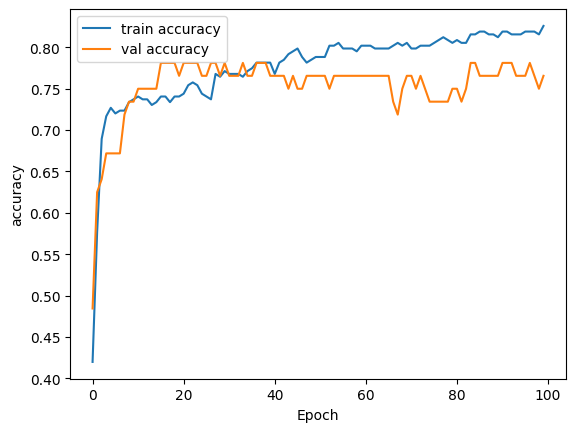

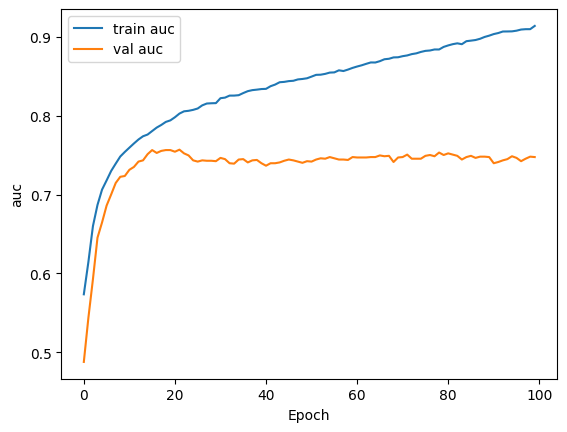

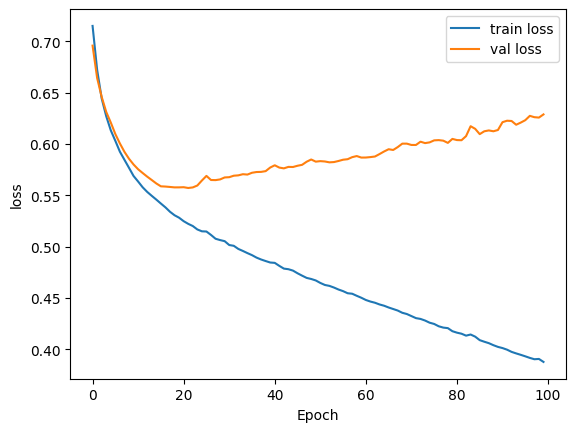

In [39]:
#Seeing how the metrics change for each epoch
import matplotlib.pyplot as plt
metrics = ["accuracy","auc","loss"]
for metric in metrics:
    plt.plot(history.history[metric], label=f"train {metric}")
    plt.plot(history.history[f"val_{metric}"], label=f"val {metric}")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.show()

In [40]:
#Saving the model to memory to reuse without retraining
model.save("models/initial_model.keras")